In [1]:
from offloading_dataloader import Dataloader, plot_example
import class_transition_model as ctm
import torch
import math
from matplotlib import pyplot as plt, cm

class_transition_model_path = '../networks/transition_model_small.pth'

In [2]:
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
dataloader = Dataloader(image_path='../data/train-images.idx3-ubyte',
                        label_path='../data/train-labels.idx1-ubyte',
                        dtype=dtype)

dataloader.set_scale(mean=1, std=0.1)
dataloader.set_rotation(mean=0, std=0.1 * math.pi)

or_img, trns_img, lbl, pose = dataloader.sample(10)

F:\OneDrive\Documents\University\Bachelor Thesis\active_mnist_thesis\offloading_dataloader.py:81: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  self.images = torch.Tensor(np.reshape(images, [images.shape[0], 1, images.shape[1], images.shape[2]]))


Active MNIST Dataloader initialized on <class 'torch.cuda.FloatTensor'>
batch_size = 1024, iterations = 64
     Sampling indices
     Creating random transformation values
     Padding images
     Transforming images


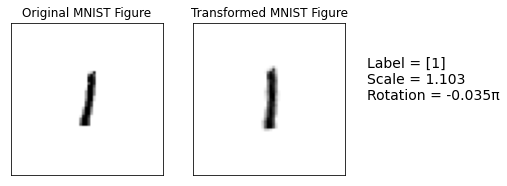

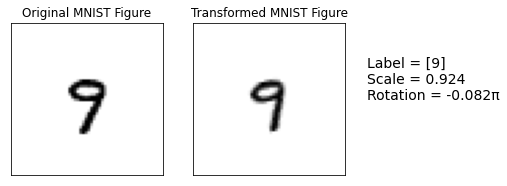

In [3]:
plot_example(or_img, trns_img, lbl, pose, number_examples=2)

finished training


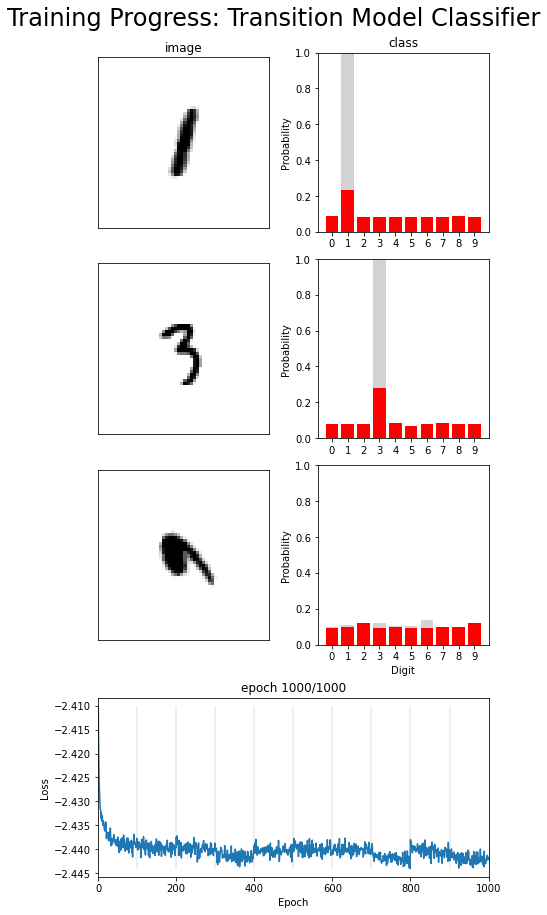

In [4]:
# Training
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

cls_trns_model = ctm.TransitionModel(dtype=dtype)
cls_trns_model.cuda()
loss = cls_trns_model.train_classifier(dataloader, max_epochs=1000, sample_length=100)
torch.save(cls_trns_model.state_dict(), class_transition_model_path)
print('finished training')

     Sampling indices
     Creating random transformation values
     Padding images
     Transforming images


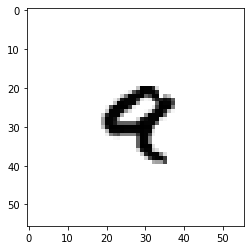

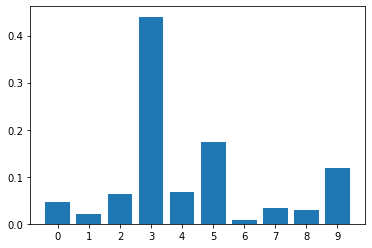

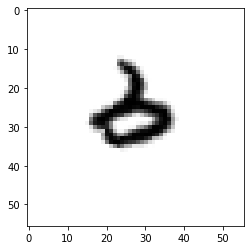

In [7]:
dtype = torch.FloatTensor

cls_trns_model = ctm.TransitionModel(dtype=dtype)
cls_trns_model.load_state_dict(torch.load(class_transition_model_path))
cls_trns_model.eval()


or_img, _, lbl, _ = dataloader.sample(1000)
or_img = or_img.cpu().data
lbl = lbl.cpu().data

number = 9
# find a number
index = 0
for i in range(len(lbl)):
    if lbl[i, number] == 1:
        index = i
        break

plt.imshow(or_img[index].reshape([56, 56]), cmap=cm.gray_r)
plt.show()

scale = torch.Tensor([1.1])
rotation = torch.Tensor([math.pi * 1.1])

new_state = cls_trns_model(or_img[index].reshape([1, 1, 56, 56]), [scale, rotation]).detach().numpy().reshape([10])

plt.bar(range(len(new_state)), new_state)
plt.xticks(range(10))
plt.show()

new_img = cls_trns_model.image_transformer(or_img[index].reshape([1, 1, 56, 56]), scale, rotation)
plt.imshow(new_img.reshape([56, 56]), cmap=cm.gray_r)
plt.show()